# Camera Calibration

In [51]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def calibrate_camera():
    
    files = glob.glob('camera_cal/calibration*.jpg')
    checkerboardsize = (9,6)
    
    h_count,v_count = checkerboardsize
    
    objp = np.zeros((v_count*h_count,3), np.float32)
    objp[:,:2] = np.mgrid[0:h_count, 0:v_count].T.reshape(-1,2)
    
    objpoints = []
    imgpoints = []
    
    for idx, fname in enumerate(files):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (h_count,v_count), None)

        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    
    image = cv2.imread(files[0])
    image_size = (image.shape[1], image.shape[0])
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size,None,None)

    return mtx, dist

cameraMatrix, distortionCoefficients = calibrate_camera()

def undistort(image):
  
    dst = cv2.undistort(
        image, 
        cameraMatrix, 
        distortionCoefficients, 
        None, 
        cameraMatrix)
    
    return dst


def test_undistort(file):
    
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    dst = undistort(img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    

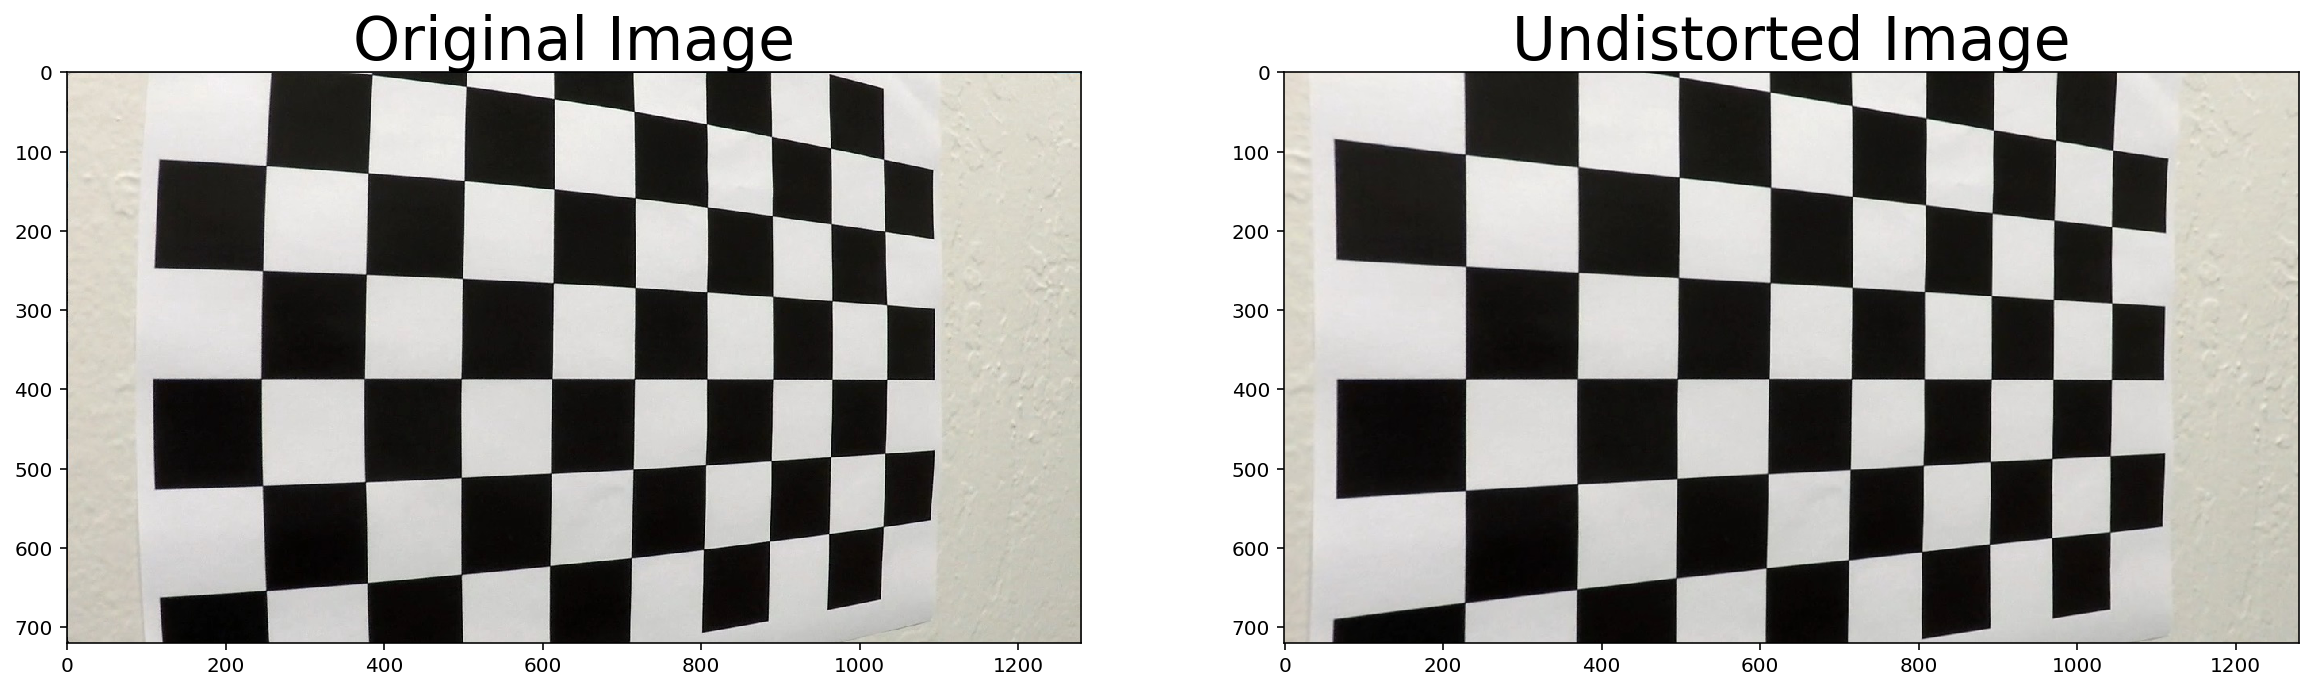

In [2]:
test_undistort('camera_cal/calibration5.jpg')

# Distortion Correction

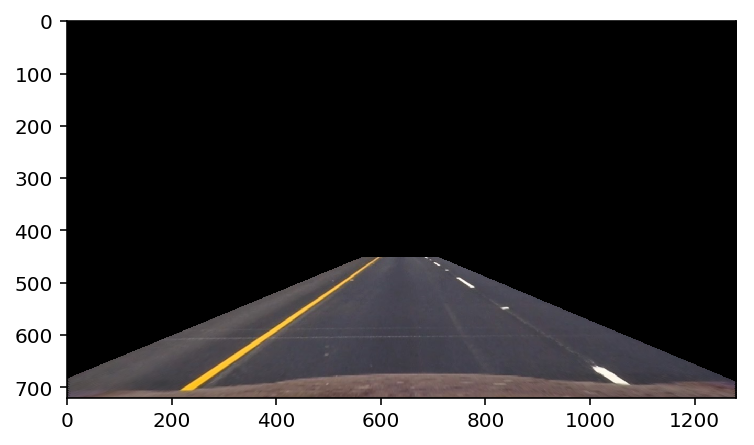

In [58]:
def perspective_transforms():
    
    src = np.float32([
        [592,450], #top_left
        [686,450], #top_right
        [1074,693], #bottom_right
        [231,693] #bottom_left
        ])

    dst = np.float32([
        [250,0], #top_left
        [1080,0], #top_right
        [1070,678], #bottom_right
        [250,678] #bottom_left
        ])  
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    return M, Minv

M,Minv = perspective_transforms()

def transform(image):
    result = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR) 
    return result

def reverse(image):
    result = cv2.warpPerspective(image, Minv, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR) 
    return result


def test_transform():
    
    img = cv2.imread('test_images/straight_lines1.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = undistort(img)
    
    warped = transform(img)
    plt.imshow(reverse(warped))
 

test_transform()

#pts = np.array(src, np.int32)
#pts = pts.reshape((-1,1,2))
#cv2.polylines(undistorted,[pts],True,(255,0,0), thickness = 1)  
#for corner in src:
#    cv2.circle(img, (corner[0],corner[1]),1, (255, 0, 0), 5)
#  



                             
                             
                        




